In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler

In [2]:
df = pd.read_csv('FinancialMarketDataFormatted.csv')

df.drop(columns=['LLL1 Index'], inplace=True)

print("Shape", df.shape)
print("First few rows")
display(df.head())
print("Info")
df.info()

Shape (1148, 57)
First few rows


,Date,XAU BGNL Curncy,ECSURPUS Index,BDIY Index,CRY Index,DXY Curncy,JPY Curncy,GBP Curncy,Cl1 Comdty,VIX Index,...,RX1 Comdty,TY1 Comdty,GC1 Comdty,CO1 Comdty,ES1 Index,VG1 Index,NQ1 Index,TP1 Index,DU1 Comdty,TU2 Comdty
0,4/27/1999,282.25,NaN,995.0,134.65,100.63,120.44,1.617,17.81,23.36,...,115.76,115.563,282.3,15.80,1376.50,3726.0,NaN,1347.5,105.69,104.898
1,5/4/1999,285.55,NaN,1095.0,139.04,100.68,120.77,1.626,18.92,25.62,...,115.11,114.313,286.9,16.93,1343.00,3740.0,NaN,1328.5,105.58,104.664
2,5/11/1999,278.25,NaN,1121.0,136.78,100.24,121.07,1.621,18.06,25.62,...,114.60,113.344,278.8,15.96,1358.25,3690.0,NaN,1343.5,105.67,104.406
3,5/18/1999,273.95,NaN,1061.0,133.90,100.72,123.21,1.621,17.11,27.26,...,114.24,112.344,274.2,15.14,1341.25,3595.0,NaN,1323.5,105.60,104.141
4,5/25/1999,271.45,NaN,1017.0,132.09,101.38,122.85,1.602,17.14,28.90,...,114.79,113.125,270.8,15.43,1284.50,3631.0,NaN,1307.0,105.68,104.289


Info
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1148 entries, 0 to 1147
Data columns (total 57 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Date             1148 non-null   object 
 1   XAU BGNL Curncy  1148 non-null   float64
 2   ECSURPUS Index   1111 non-null   float64
 3   BDIY Index       1148 non-null   float64
 4   CRY Index        1148 non-null   float64
 5   DXY Curncy       1148 non-null   float64
 6   JPY Curncy       1148 non-null   float64
 7   GBP Curncy       1148 non-null   float64
 8   Cl1 Comdty       1148 non-null   float64
 9   VIX Index        1148 non-null   float64
 10  USGG30YR Index   1148 non-null   float64
 11  GT10 Govt        1148 non-null   float64
 12  USGG2YR Index    1148 non-null   float64
 13  USGG3M Index     1148 non-null   float64
 14  US0001M Index    1148 non-null   float64
 15  GTDEM30Y Govt    1148 non-null   float64
 16  GTDEM10Y Govt    1148 non-null   float64
 17  GTDEM2Y G

In [3]:
df['Pct_Change'] = df['MXWO Index'].pct_change(periods=-1) * 100
df['CRASH'] = (df['Pct_Change'] <= -5).astype(int)

In [4]:
print(df['CRASH'].value_counts())

CRASH
0    1132
1      16
Name: count, dtype: int64


In [5]:
print(df.isnull().sum())

Date                0
XAU BGNL Curncy     0
ECSURPUS Index     37
BDIY Index          0
CRY Index           0
DXY Curncy          0
JPY Curncy          0
GBP Curncy          0
Cl1 Comdty          0
VIX Index           0
USGG30YR Index      0
GT10 Govt           0
USGG2YR Index       0
USGG3M Index        0
US0001M Index       0
GTDEM30Y Govt       0
GTDEM10Y Govt       0
GTDEM2Y Govt        0
EONIA Index         0
GTITL30YR Corp     27
GTITL10YR Corp     27
GTITL2YR Corp      27
GTJPY30YR Corp     19
GTJPY10YR Corp      0
GTJPY2YR Corp       0
GTGBP30Y Govt       0
GTGBP20Y Govt       0
GTGBP2Y Govt        0
LUMSTRUU Index      0
LMBITR Index        0
LUACTRUU Index      0
LF98TRUU Index      0
LG30TRUU Index      0
LP01TREU Index      0
EMUSTRUU Index      0
LF94TRUU Index      1
MXUS Index          0
MXEU Index          0
MXJP Index          0
MXBR Index          0
MXRU Index          0
MXIN Index          0
MXCN Index          0
MXWO Index          0
MXWD Index          0
LEGATRUU I

In [6]:
df['ECSURPUS Index'].fillna(0, inplace=True)

/tmp/ipykernel_10618/479392374.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['ECSURPUS Index'].fillna(0, inplace=True)


In [7]:
print(df.isnull().sum())

Date                0
XAU BGNL Curncy     0
ECSURPUS Index      0
BDIY Index          0
CRY Index           0
DXY Curncy          0
JPY Curncy          0
GBP Curncy          0
Cl1 Comdty          0
VIX Index           0
USGG30YR Index      0
GT10 Govt           0
USGG2YR Index       0
USGG3M Index        0
US0001M Index       0
GTDEM30Y Govt       0
GTDEM10Y Govt       0
GTDEM2Y Govt        0
EONIA Index         0
GTITL30YR Corp     27
GTITL10YR Corp     27
GTITL2YR Corp      27
GTJPY30YR Corp     19
GTJPY10YR Corp      0
GTJPY2YR Corp       0
GTGBP30Y Govt       0
GTGBP20Y Govt       0
GTGBP2Y Govt        0
LUMSTRUU Index      0
LMBITR Index        0
LUACTRUU Index      0
LF98TRUU Index      0
LG30TRUU Index      0
LP01TREU Index      0
EMUSTRUU Index      0
LF94TRUU Index      1
MXUS Index          0
MXEU Index          0
MXJP Index          0
MXBR Index          0
MXRU Index          0
MXIN Index          0
MXCN Index          0
MXWO Index          0
MXWD Index          0
LEGATRUU I

In [8]:
df.fillna(method='ffill', inplace=True)

/tmp/ipykernel_10618/3970806690.py:1: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df.fillna(method='ffill', inplace=True)


In [9]:
df.fillna(method='bfill', inplace=True)

/tmp/ipykernel_10618/3314729575.py:1: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df.fillna(method='bfill', inplace=True)


In [11]:
# Define columns for which to create lagged features
columns_to_lag = ['VIX Index', 'MXWO Index']

# Number of lags to create
num_lags = 3  # 1-week, 2-week, 3-week lags

# Create lagged features
for col in columns_to_lag:
    for lag in range(1, num_lags + 1):
        df[f'{col}_lag_{lag}'] = df[col].shift(lag)


In [12]:
df

,Date,XAU BGNL Curncy,ECSURPUS Index,BDIY Index,CRY Index,DXY Curncy,JPY Curncy,GBP Curncy,Cl1 Comdty,VIX Index,...,DU1 Comdty,TU2 Comdty,Pct_Change,CRASH,VIX Index_lag_1,VIX Index_lag_2,VIX Index_lag_3,MXWO Index_lag_1,MXWO Index_lag_2,MXWO Index_lag_3
0,4/27/1999,282.25,0.000,995.0,134.650,100.630,120.44,1.617,17.81,23.36,...,105.690,104.898,1.549891,0,NaN,NaN,NaN,NaN,NaN,NaN
1,5/4/1999,285.55,0.000,1095.0,139.040,100.680,120.77,1.626,18.92,25.62,...,105.580,104.664,-0.548480,0,23.36,NaN,NaN,1252.10,NaN,NaN
2,5/11/1999,278.25,0.000,1121.0,136.780,100.240,121.07,1.621,18.06,25.62,...,105.670,104.406,2.276027,0,25.62,23.36,NaN,1232.99,1252.10,NaN
3,5/18/1999,273.95,0.000,1061.0,133.900,100.720,123.21,1.621,17.11,27.26,...,105.600,104.141,2.262566,0,25.62,25.62,23.36,1239.79,1232.99,1252.10
4,5/25/1999,271.45,0.000,1017.0,132.090,101.380,122.85,1.602,17.14,28.90,...,105.680,104.289,-0.105340,0,27.26,25.62,25.62,1212.20,1239.79,1232.99
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1143,3/23/2021,1727.96,0.339,2271.0,184.502,92.336,108.72,1.376,57.76,20.30,...,112.140,110.383,-0.609247,0,19.79,24.03,24.10,2823.69,2761.82,2768.25
1144,3/30/2021,1685.56,0.303,2103.0,184.874,93.297,110.29,1.372,60.55,19.61,...,112.090,110.387,-2.473029,0,20.30,19.79,24.03,2788.01,2823.69,2761.82
1145,4/6/2021,1743.28,0.440,2092.0,185.839,92.335,109.88,1.382,59.33,18.12,...,112.120,110.281,-1.437878,0,19.61,20.30,19.79,2805.10,2788.01,2823.69
1146,4/13/2021,1742.69,0.467,2140.0,188.137,91.852,109.19,1.374,60.18,16.65,...,112.115,110.293,-0.878382,0,18.12,19.61,20.30,2876.23,2805.10,2788.01


Now time to normalize with Min-Max Scaling
We choose Min-Max scaling because our data has a defined range

In [13]:
from sklearn.preprocessing import MinMaxScaler

# Columns to normalize (exclude 'CRASH' and 'Date')
columns_to_normalize = [col for col in df.columns if col not in ['Date', 'CRASH']]

# Initialize the scaler
scaler = MinMaxScaler()

# Apply scaling to the selected columns
df[columns_to_normalize] = scaler.fit_transform(df[columns_to_normalize])


In [14]:
df

,Date,XAU BGNL Curncy,ECSURPUS Index,BDIY Index,CRY Index,DXY Curncy,JPY Curncy,GBP Curncy,Cl1 Comdty,VIX Index,...,DU1 Comdty,TU2 Comdty,Pct_Change,CRASH,VIX Index_lag_1,VIX Index_lag_2,VIX Index_lag_3,MXWO Index_lag_1,MXWO Index_lag_2,MXWO Index_lag_3
0,4/27/1999,0.016425,0.495674,0.061207,0.078491,0.604256,0.758221,0.487404,0.059560,0.209537,...,0.390286,0.542358,0.478313,0,NaN,NaN,NaN,NaN,NaN,NaN
1,5/4/1999,0.018307,0.495674,0.069901,0.090642,0.605288,0.763844,0.497262,0.068036,0.243532,...,0.380746,0.523333,0.401156,0,0.209537,NaN,NaN,0.247081,NaN,NaN
2,5/11/1999,0.014143,0.495674,0.072161,0.084387,0.596214,0.768956,0.491785,0.061469,0.243532,...,0.388552,0.502358,0.505014,0,0.243532,0.209537,NaN,0.238445,0.251856,NaN
3,5/18/1999,0.011691,0.495674,0.066945,0.076415,0.606112,0.805418,0.491785,0.054215,0.268201,...,0.382480,0.480813,0.504519,0,0.243532,0.243532,0.209537,0.241518,0.243054,0.257561
4,5/25/1999,0.010265,0.495674,0.063119,0.071405,0.619723,0.799284,0.470975,0.054444,0.292870,...,0.389419,0.492846,0.417451,0,0.268201,0.243532,0.243532,0.229050,0.246186,0.248559
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1143,3/23/2021,0.840915,0.668193,0.172144,0.216479,0.433214,0.558528,0.223439,0.364615,0.163508,...,0.949696,0.988293,0.398922,0,0.155836,0.219615,0.220668,0.957295,0.947298,0.971783
1144,3/30/2021,0.816734,0.649873,0.157538,0.217509,0.453033,0.585279,0.219058,0.385919,0.153129,...,0.945360,0.988618,0.330390,0,0.163508,0.155836,0.219615,0.941171,0.975798,0.968754
1145,4/6/2021,0.849652,0.719593,0.156581,0.220180,0.433194,0.578293,0.230011,0.376604,0.130716,...,0.947962,0.980000,0.368453,0,0.153129,0.163508,0.155836,0.948894,0.959362,0.997899
1146,4/13/2021,0.849315,0.733333,0.160755,0.226541,0.423233,0.566536,0.221249,0.383094,0.108604,...,0.947528,0.980976,0.389026,0,0.130716,0.153129,0.163508,0.981038,0.967234,0.981091


In [15]:
# Drop rows with NaN values
df.dropna(inplace=True)

# Reset the index after dropping rows
df.reset_index(drop=True, inplace=True)


In [33]:
#printing all columns 
print(df.columns.tolist())

#pringint the unique valud of the crash column and the count of each value
print(df['CRASH'].value_counts())


['Date', 'XAU BGNL Curncy', 'ECSURPUS Index', 'BDIY Index', 'CRY Index', 'DXY Curncy', 'JPY Curncy', 'GBP Curncy', 'Cl1 Comdty', 'VIX Index', 'USGG30YR Index', 'GT10 Govt', 'USGG2YR Index', 'USGG3M Index', 'US0001M Index', 'GTDEM30Y Govt', 'GTDEM10Y Govt', 'GTDEM2Y Govt', 'EONIA Index', 'GTITL30YR Corp', 'GTITL10YR Corp', 'GTITL2YR Corp', 'GTJPY30YR Corp', 'GTJPY10YR Corp', 'GTJPY2YR Corp', 'GTGBP30Y Govt', 'GTGBP20Y Govt', 'GTGBP2Y Govt', 'LUMSTRUU Index', 'LMBITR Index', 'LUACTRUU Index', 'LF98TRUU Index', 'LG30TRUU Index', 'LP01TREU Index', 'EMUSTRUU Index', 'LF94TRUU Index', 'MXUS Index', 'MXEU Index', 'MXJP Index', 'MXBR Index', 'MXRU Index', 'MXIN Index', 'MXCN Index', 'MXWO Index', 'MXWD Index', 'LEGATRUU Index', 'HFRXGL Index', 'RX1 Comdty', 'TY1 Comdty', 'GC1 Comdty', 'CO1 Comdty', 'ES1 Index', 'VG1 Index', 'NQ1 Index', 'TP1 Index', 'DU1 Comdty', 'TU2 Comdty', 'Pct_Change', 'CRASH', 'VIX Index_lag_1', 'VIX Index_lag_2', 'VIX Index_lag_3', 'MXWO Index_lag_1', 'MXWO Index_lag_2'

Time to split the data

In [19]:
#the dataset
df = df

from xgboost import XGBClassifier
from sklearn.metrics import classification_report, roc_auc_score, precision_score, recall_score, f1_score
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import ParameterGrid

def split_time_series(df, train_pct=60, val_pct=20, test_pct=20, target_col='CRASH', date_col='Date'):
    """
    Split time series data chronologically into train, validation and test sets
    
    Args:
        df: pandas DataFrame with time series data
        train_pct: percentage for training set (default 60%)
        val_pct: percentage for validation set (default 20%) 
        test_pct: percentage for test set (default 20%)
        target_col: name of target column (default 'CRASH')
        date_col: name of date column (default 'Date')
    
    Returns:
        Tuple of (X_train, X_val, X_test, y_train, y_val, y_test)
    """
    # Validate percentages
    if train_pct + val_pct + test_pct != 100:
        raise ValueError("Percentages must sum to 100")
    
    # Calculate split indices
    n = len(df)
    train_idx = int(n * train_pct/100)
    val_idx = int(n * (train_pct + val_pct)/100)
    
    # Split data chronologically
    train_data = df.iloc[:train_idx]
    val_data = df.iloc[train_idx:val_idx]
    test_data = df.iloc[val_idx:]
    
    # Create feature sets by dropping target and date columns
    feature_cols = [col for col in df.columns if col not in [target_col, date_col]]
    
    X_train = train_data[feature_cols]
    y_train = train_data[target_col]
    
    X_val = val_data[feature_cols]
    y_val = val_data[target_col]
    
    X_test = test_data[feature_cols]
    y_test = test_data[target_col]
    
    return X_train, X_val, X_test, y_train, y_val, y_test


def train_evaluate_model(df, target_col='CRASH', date_col='Date', 
                        train_pct=60, val_pct=20, test_pct=20,
                        random_state=42):
    """
    Train XGBoost model with SMOTE and hyperparameter tuning
    """
    # Split data
    X_train, X_val, X_test, y_train, y_val, y_test = split_time_series(
        df, train_pct, val_pct, test_pct, target_col, date_col
    )
    
    # Apply SMOTE to training data
    smote = SMOTE(random_state=random_state)
    X_train_balanced, y_train_balanced = smote.fit_resample(X_train, y_train)
    
    # Define hyperparameter grid
    param_grid = {
        'n_estimators': [100, 200, 300],
        'learning_rate': [0.01, 0.1],
        'max_depth': [3, 4, 5],
        'min_child_weight': [1, 3, 5]
    }
    
    # Track best model and score
    best_model = None
    best_val_score = 0
    
    # Grid search with validation set
    for params in ParameterGrid(param_grid):
        model = XGBClassifier(random_state=random_state, **params)
        model.fit(X_train_balanced, y_train_balanced)
        
        # Evaluate on validation set
        val_pred_proba = model.predict_proba(X_val)[:, 1]
        val_score = roc_auc_score(y_val, val_pred_proba)
        
        if val_score > best_val_score:
            best_val_score = val_score
            best_model = model
    
    # Evaluate best model on test set
    y_pred = best_model.predict(X_test)
    y_pred_proba = best_model.predict_proba(X_test)[:, 1]
    
    # Calculate metrics
    metrics = {
        'roc_auc': roc_auc_score(y_test, y_pred_proba),
        'precision': precision_score(y_test, y_pred),
        'recall': recall_score(y_test, y_pred),
        'f1': f1_score(y_test, y_pred),
        'classification_report': classification_report(y_test, y_pred)
    }
    
    return best_model, metrics



In [31]:
import numpy as np
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd


import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming df is already loaded and preprocessed
best_model, metrics = train_evaluate_model(
    df=df,
    target_col='CRASH',
    date_col='Date',
    train_pct=60,
    val_pct=15,
    test_pct=25,
    random_state=42
)

# Print performance metrics
print("Model Performance Metrics:")
print("-" * 50)
print(f"ROC-AUC Score: {metrics['roc_auc']:.3f}")
print(f"Precision: {metrics['precision']:.3f}")
print(f"Recall: {metrics['recall']:.3f}")
print(f"F1 Score: {metrics['f1']:.3f}")
print("\nDetailed Classification Report:")
print(metrics['classification_report'])


Model Performance Metrics:
--------------------------------------------------
ROC-AUC Score: 1.000
Precision: 1.000
Recall: 1.000
F1 Score: 1.000

Detailed Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       284
           1       1.00      1.00      1.00         3

    accuracy                           1.00       287
   macro avg       1.00      1.00      1.00       287
weighted avg       1.00      1.00      1.00       287



Dataset Overview with Date Ranges:

Training Set:
Date Range: 1999-05-18 00:00:00 to 2012-07-10 00:00:00
Shape: (687, 65)

First 5 rows:
        Date  XAU BGNL Curncy  ECSURPUS Index  BDIY Index  CRY Index  \
0 1999-05-18         0.011691        0.495674    0.066945   0.076415   
1 1999-05-25         0.010265        0.495674    0.063119   0.071405   
2 1999-06-01         0.007813        0.495674    0.059468   0.067641   
3 1999-06-08         0.004676        0.495674    0.062859   0.082588   
4 1999-06-15         0.003593        0.495674    0.062859   0.086186   

   DXY Curncy  JPY Curncy  GBP Curncy  Cl1 Comdty  VIX Index  ...  DU1 Comdty  \
0    0.606112    0.805418    0.491785    0.054215   0.268201  ...    0.382480   
1    0.619723    0.799284    0.470975    0.054444   0.292870  ...    0.389419   
2    0.633953    0.758392    0.481928    0.048335   0.258574  ...    0.353859   
3    0.627560    0.737945    0.474261    0.058415   0.219465  ...    0.356461   
4    0.636840    0.762651

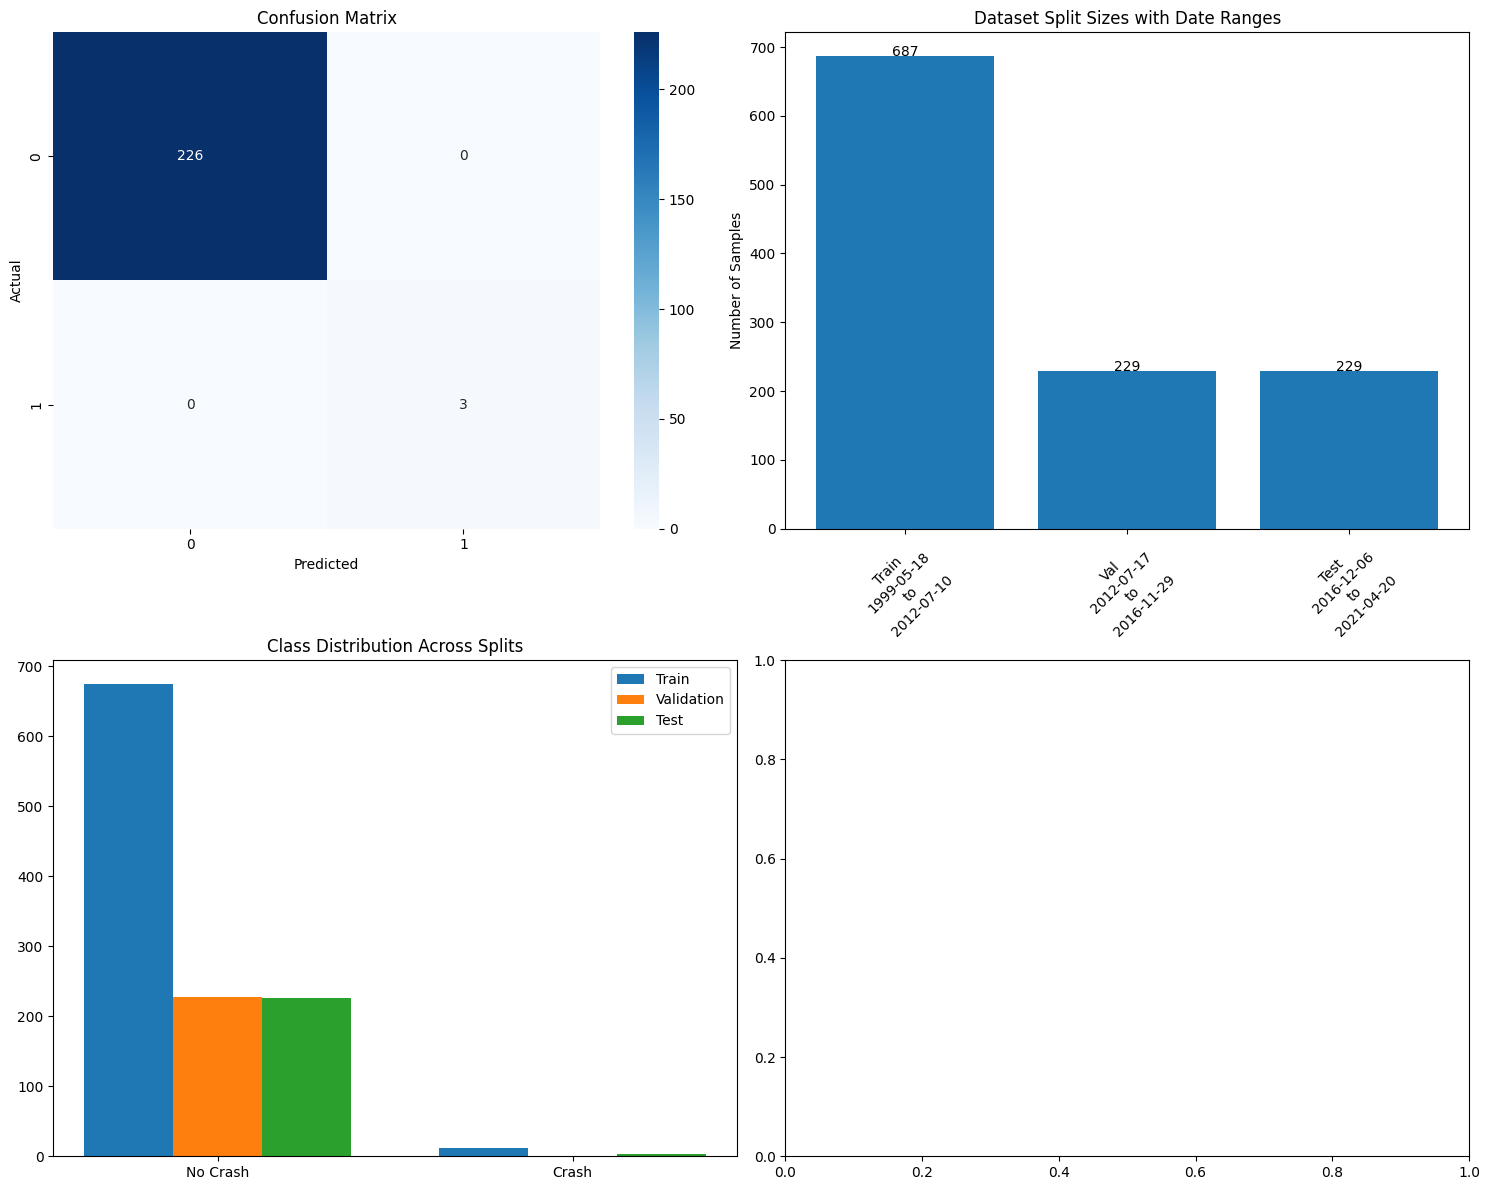

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

# Convert 'Date' column to datetime
df['Date'] = pd.to_datetime(df['Date'])

# Create combined DataFrames with dates
train_dates = df.iloc[:len(X_train)]['Date']
val_dates = df.iloc[len(X_train):len(X_train)+len(X_val)]['Date']
test_dates = df.iloc[len(X_train)+len(X_val):]['Date']

# Combine features, target and dates
train_df = pd.concat([pd.Series(train_dates).reset_index(drop=True), 
                      X_train.reset_index(drop=True), 
                      y_train.reset_index(drop=True)], axis=1)
val_df = pd.concat([pd.Series(val_dates).reset_index(drop=True), 
                    X_val.reset_index(drop=True), 
                    y_val.reset_index(drop=True)], axis=1)
test_df = pd.concat([pd.Series(test_dates).reset_index(drop=True), 
                     X_test.reset_index(drop=True), 
                     y_test.reset_index(drop=True)], axis=1)

# Print dataset information with dates
print("Dataset Overview with Date Ranges:")
print("="*80)

print("\nTraining Set:")
print(f"Date Range: {train_dates.iloc[0]} to {train_dates.iloc[-1]}")
print(f"Shape: {train_df.shape}")
print("\nFirst 5 rows:")
print(train_df.head())

print("\nValidation Set:")
print(f"Date Range: {val_dates.iloc[0]} to {val_dates.iloc[-1]}")
print(f"Shape: {val_df.shape}")
print("\nFirst 5 rows:")
print(val_df.head())

print("\nTest Set:")
print(f"Date Range: {test_dates.iloc[0]} to {test_dates.iloc[-1]}")
print(f"Shape: {test_df.shape}")
print("\nFirst 5 rows:")
print(test_df.head())

# Visualizations
fig, axes = plt.subplots(2, 2, figsize=(15, 12))

# 1. Confusion Matrix
y_pred = best_model.predict(X_test)
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', ax=axes[0,0])
axes[0,0].set_title('Confusion Matrix')
axes[0,0].set_xlabel('Predicted')
axes[0,0].set_ylabel('Actual')

# 2. Dataset Split Sizes with Date Ranges
split_sizes = [len(X_train), len(X_val), len(X_test)]
split_names = [f'Train\n{train_dates.iloc[0].strftime("%Y-%m-%d")}\nto\n{train_dates.iloc[-1].strftime("%Y-%m-%d")}',
               f'Val\n{val_dates.iloc[0].strftime("%Y-%m-%d")}\nto\n{val_dates.iloc[-1].strftime("%Y-%m-%d")}',
               f'Test\n{test_dates.iloc[0].strftime("%Y-%m-%d")}\nto\n{test_dates.iloc[-1].strftime("%Y-%m-%d")}']
axes[0,1].bar(split_names, split_sizes)
for i, v in enumerate(split_sizes):
    axes[0,1].text(i, v, str(v), ha='center')
axes[0,1].set_title('Dataset Split Sizes with Date Ranges')
axes[0,1].set_ylabel('Number of Samples')
plt.setp(axes[0,1].xaxis.get_majorticklabels(), rotation=45)

# 3. Class Distribution
class_dist_train = y_train.value_counts()
class_dist_val = y_val.value_counts()
class_dist_test = y_test.value_counts()

width = 0.25
x = np.arange(2)
axes[1,0].bar(x - width, class_dist_train, width, label='Train')
axes[1,0].bar(x, class_dist_val, width, label='Validation')
axes[1,0].bar(x + width, class_dist_test, width, label='Test')
axes[1,0].set_xticks(x)
axes[1,0].set_xticklabels(['No Crash', 'Crash'])
axes[1,0].set_title('Class Distribution Across Splits')
axes[1,0].legend()

plt.tight_layout()
plt.show()

In [19]:
print(f"Training set size: {X_train.shape[0]} rows")
print(f"Testing set size: {X_test.shape[0]} rows")


Training set size: 916 rows
Testing set size: 229 rows


Time to train the model

In [20]:
X_train = X_train.drop(columns=['Pct_Change'])
X_test = X_test.drop(columns=['Pct_Change'])


In [30]:
from xgboost import XGBClassifier
from sklearn.metrics import classification_report, roc_auc_score

# Initialize the XGBoost classifier
model = XGBClassifier(
    n_estimators=100,  # Number of trees
    learning_rate=0.1,  # Step size
    max_depth=3,  # Maximum tree depth
    random_state=42  # Reproducibility
)

# Train the model
model.fit(X_train, y_train)

# Predict on the test set
y_pred = model.predict(X_test)
y_pred_proba = model.predict_proba(X_test)[:, 1]  # Confidence scores for CRASH (1)

# Evaluate the model
print("Classification Report:")
print(classification_report(y_test, y_pred))

# Compute and display the ROC-AUC score
roc_auc = roc_auc_score(y_test, y_pred_proba)
print(f"ROC-AUC Score: {roc_auc:.2f}")


Classification Report:
              precision    recall  f1-score   support

           0       0.99      1.00      0.99       226
           1       0.00      0.00      0.00         3

    accuracy                           0.99       229
   macro avg       0.49      0.50      0.50       229
weighted avg       0.97      0.99      0.98       229

ROC-AUC Score: 0.99


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [31]:
print(df['CRASH'].value_counts())

CRASH
0    1129
1      16
Name: count, dtype: int64


In [32]:
crash_row = df[df['CRASH'] == 1]
print(crash_row)


            Date  XAU BGNL Curncy  ECSURPUS Index  BDIY Index  CRY Index  \
43     3/14/2000         0.020616        0.744020    0.117719   0.192033   
166    7/23/2002         0.034389        0.679389    0.059207   0.173598   
177    10/8/2002         0.037127        0.425954    0.091897   0.210412   
199    3/11/2003         0.055348        0.435115    0.128152   0.311941   
493   10/28/2008         0.274936        0.296183    0.060077   0.422742   
512    3/10/2009         0.365352        0.084478    0.174491   0.280524   
513    3/17/2009         0.377482        0.096692    0.146322   0.304938   
519    4/28/2009         0.364993        0.396947    0.130325   0.307041   
530    7/14/2009         0.382843        0.745547    0.243958   0.359577   
577     6/8/2010         0.564855        0.708397    0.285863   0.397997   
581     7/6/2010         0.536283        0.482952    0.159624   0.408293   
646    10/4/2011         0.780195        0.366921    0.138585   0.517572   
854    9/29/

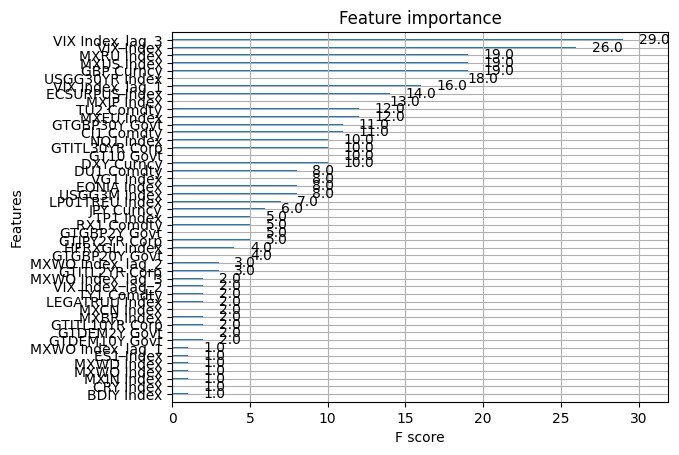

In [33]:
from xgboost import plot_importance
import matplotlib.pyplot as plt

plot_importance(model)
plt.show()


We split the data by time because we don't want to predict the future based on future date
We created lagged features
We removed or filled in data that was NaN
We normalized the data
We trained the XGBoost model on the data, but had to remove the Pct_Change column
Trained again, but now the model is only predicting NO CRASH everytime (and getting accurate resultsl) because there are so few CRASH events
- need to use SMOTE to address how CRASH is underrepresented and NO CRASH is overrepresented

In [34]:
from imblearn.over_sampling import SMOTE

smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)


In [35]:
from imblearn.under_sampling import RandomUnderSampler

rus = RandomUnderSampler(random_state=42)
X_train_resampled, y_train_resampled = rus.fit_resample(X_train, y_train)


In [36]:

# Train the model with resampled data
model = XGBClassifier(random_state=42, eval_metric='aucpr')
model.fit(X_train_resampled, y_train_resampled)

# Make predictions
y_pred = model.predict(X_test)
y_pred_proba = model.predict_proba(X_test)[:, 1]

# Evaluate the model
from sklearn.metrics import classification_report, roc_auc_score
print("Classification Report:")
print(classification_report(y_test, y_pred))
print("ROC-AUC Score:", roc_auc_score(y_test, y_pred_proba))


Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.84      0.91       226
           1       0.08      1.00      0.14         3

    accuracy                           0.84       229
   macro avg       0.54      0.92      0.53       229
weighted avg       0.99      0.84      0.90       229

ROC-AUC Score: 0.9004424778761062


These results tell us that our model doesn't miss any CRASH events (perfect recall score) at the expense of many false positives (low precision)

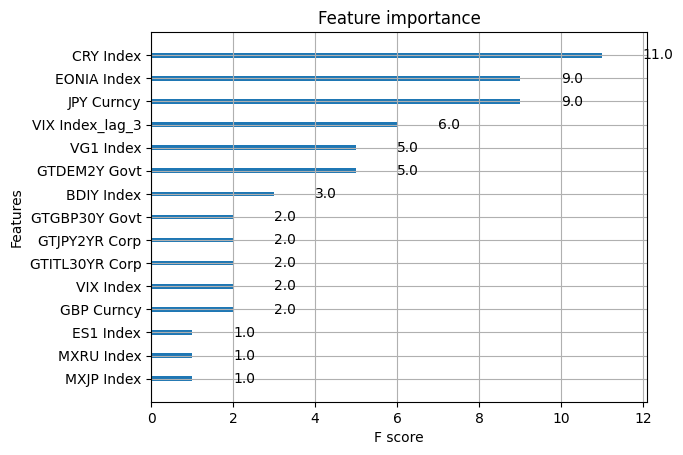

In [39]:
from xgboost import plot_importance
import matplotlib.pyplot as plt

plot_importance(model)
plt.show()

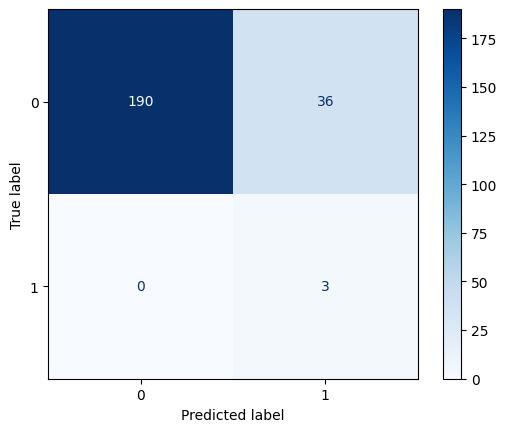

In [41]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# Generate confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Display confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=model.classes_)
disp.plot(cmap='Blues')


All done, we have our model that predicts the crashes all the time at the expense of relatively high false positive rate (36) in the test data.

In [42]:
import pickle

# Save the model to a file
with open('xgb_model.pkl', 'wb') as file:
    pickle.dump(model, file)

print("Model saved successfully!")


Model saved successfully!
